# NeuraTech E-Ticaret Platformu Veri Analizi

Bu Jupyter Notebook, NeuraTech E-Ticaret platformunda farklı ürün kategorilerindeki satışlar, müşteri değerlendirmeleri ve kargo süreleri verilerini analiz etmek için hazırlanmıştır. Aşağıda, istenen analizler ve görselleştirmeler adım adım gerçekleştirilmiştir:

1. **Kategori bazında satış analizi** (Bar Plot)
2. **Değerlendirme puanı dağılımı** (Histogram ve Yoğunluk Grafiği - histplot)
3. **Satışlar ve değerlendirme ilişkisi** (Saçılım Grafiği - scatter plot)
4. **Kargo süresi ve satış ilişkisi** (Regresyon Grafiği - regplot)
5. **Kategorilere göre değerlendirme puanı karşılaştırması** (Kutu Grafiği - boxplot)
6. **Satışlar ve değerlendirme puanlarının zaman içindeki değişimi** (Çizgi Grafikleri - line plot)

Bu analizler, Python’da `pandas`, `matplotlib` ve `seaborn` kütüphaneleri kullanılarak gerçekleştirilmiştir. Veri seti rastgele oluşturulmuş olup, tüm kodlar ve görselleştirmeler aşağıda markdown formatında düzenlenmiştir.


In [2]:
# Gerekli kütüphaneleri import edelim
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

# Rastgele veri setini oluşturalım
np.random.seed(42)  # Tekrarlanabilirlik için seed ayarlayalım

veri = {
    'Kategori': np.random.choice(['Elektronik', 'Giyim', 'Ev & Yaşam', 'Kitap'], 1000),
    'Satışlar': np.random.randint(50, 500, 1000),
    'Değerlendirme': np.random.uniform(1, 5, 1000),
    'Kargo Süresi': np.random.randint(1, 10, 1000),  # Kargo süresi (gün)
    'Tarih': [datetime.date(2023, 1, 1) + datetime.timedelta(days=i) for i in range(1000)]  # Satış tarihleri
}

df = pd.DataFrame(veri)

In [3]:
# Tarih sütununu datetime formatına çevirelim
df['Tarih'] = pd.to_datetime(df['Tarih'])

# Veri setine hızlı bir bakış
print("Veri Seti Önizlemesi:")
print(df.head())
print("\nVeri Seti Bilgileri:")
print(df.info())


Veri Seti Önizlemesi:
     Kategori  Satışlar  Değerlendirme  Kargo Süresi      Tarih
0  Ev & Yaşam       496       2.869243             5 2023-01-01
1       Kitap       194       2.188012             4 2023-01-02
2  Elektronik       250       4.411287             4 2023-01-03
3  Ev & Yaşam       466       3.862213             4 2023-01-04
4  Ev & Yaşam       261       3.356434             6 2023-01-05

Veri Seti Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Kategori       1000 non-null   object        
 1   Satışlar       1000 non-null   int64         
 2   Değerlendirme  1000 non-null   float64       
 3   Kargo Süresi   1000 non-null   int64         
 4   Tarih          1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 39.2+ KB
None



1. Kategori Bazında Satış Analizi


/tmp/ipykernel_4312/396033784.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kategori', y='Satışlar', data=kategori_satıs, palette='viridis')


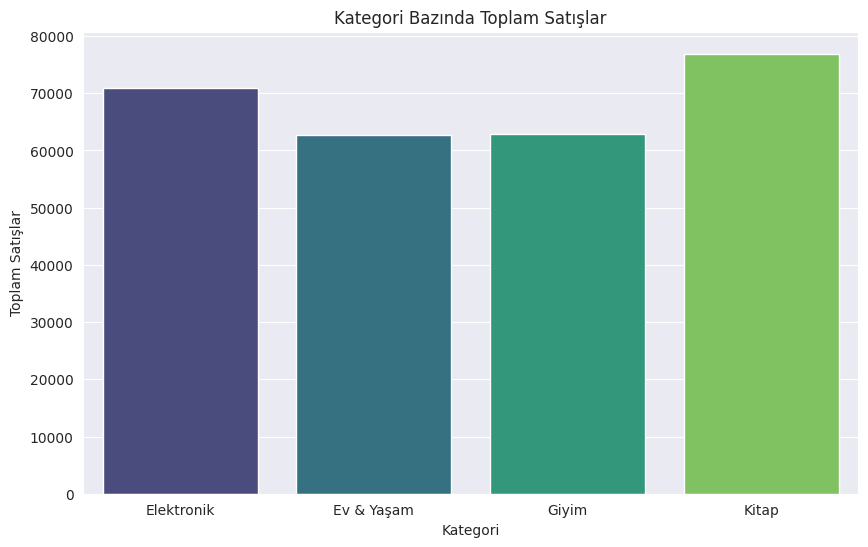

In [4]:
# 1. Kategori Bazında Satış Analizi (Bar Plot)
print("\n1. Kategori Bazında Satış Analizi")
kategori_satıs = df.groupby('Kategori')['Satışlar'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Kategori', y='Satışlar', data=kategori_satıs, palette='viridis')
plt.title('Kategori Bazında Toplam Satışlar')
plt.xlabel('Kategori')
plt.ylabel('Toplam Satışlar')
plt.show()


2. Değerlendirme Puanı Dağılımı


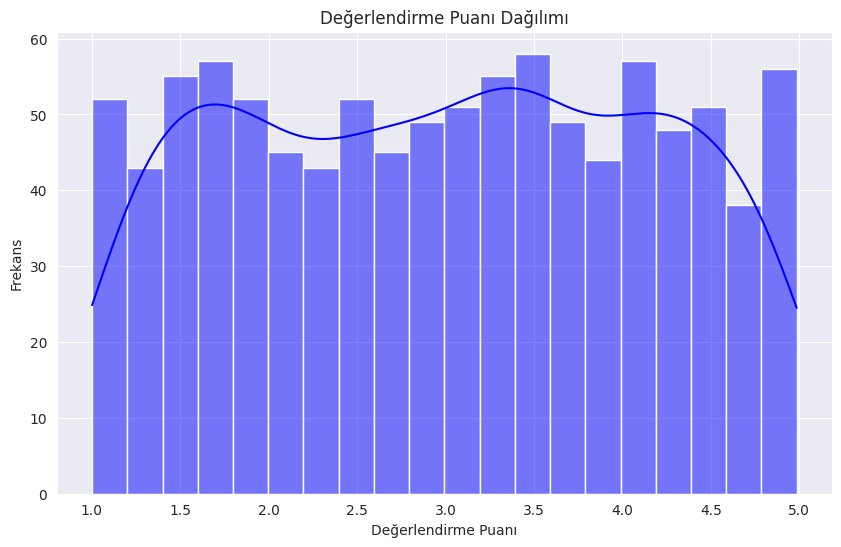

In [5]:
# 2. Değerlendirme Puanı Dağılımı (Histogram ve Yoğunluk Grafiği)
print("\n2. Değerlendirme Puanı Dağılımı")
plt.figure(figsize=(10, 6))
sns.histplot(df['Değerlendirme'], bins=20, kde=True, color='blue')
plt.title('Değerlendirme Puanı Dağılımı')
plt.xlabel('Değerlendirme Puanı')
plt.ylabel('Frekans')
plt.show()



3. Satışlar ve Değerlendirme İlişkisi


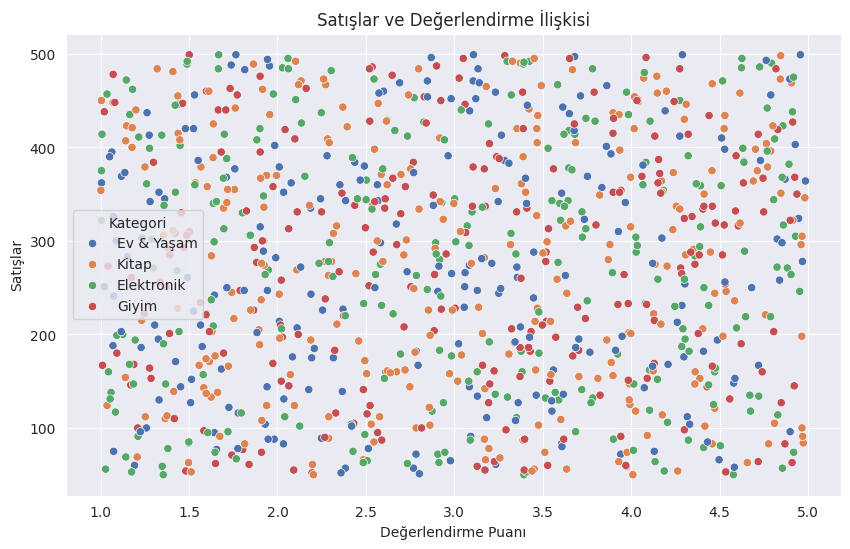

In [6]:
# 3. Satışlar ve Değerlendirme İlişkisi (Saçılım Grafiği)
print("\n3. Satışlar ve Değerlendirme İlişkisi")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Değerlendirme', y='Satışlar', data=df, hue='Kategori', palette='deep')
plt.title('Satışlar ve Değerlendirme İlişkisi')
plt.xlabel('Değerlendirme Puanı')
plt.ylabel('Satışlar')
plt.show()


4. Kargo Süresi ve Satış İlişkisi


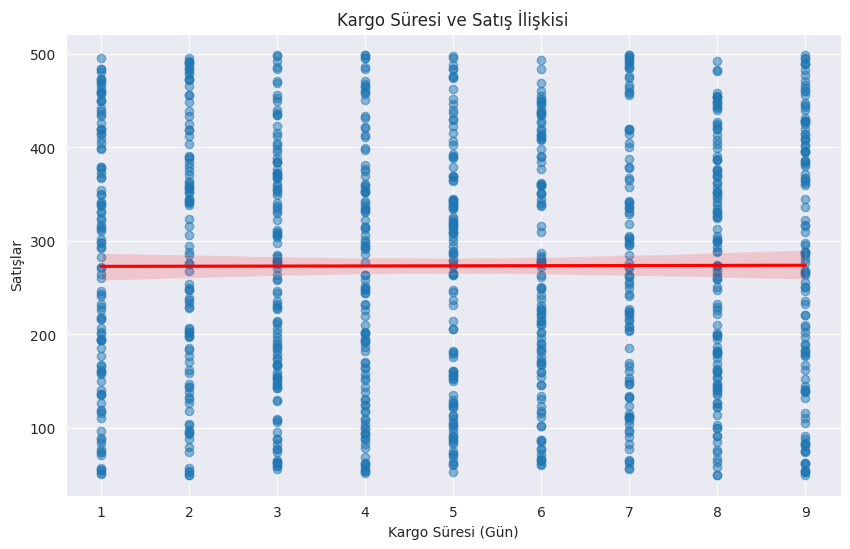

In [7]:
# 4. Kargo Süresi ve Satış İlişkisi (Regresyon Grafiği)
print("\n4. Kargo Süresi ve Satış İlişkisi")
plt.figure(figsize=(10, 6))
sns.regplot(x='Kargo Süresi', y='Satışlar', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Kargo Süresi ve Satış İlişkisi')
plt.xlabel('Kargo Süresi (Gün)')
plt.ylabel('Satışlar')
plt.show()


5. Kategorilere Göre Değerlendirme Puanı Karşılaştırması


/tmp/ipykernel_4312/316724467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Kategori', y='Değerlendirme', data=df, palette='Set3')


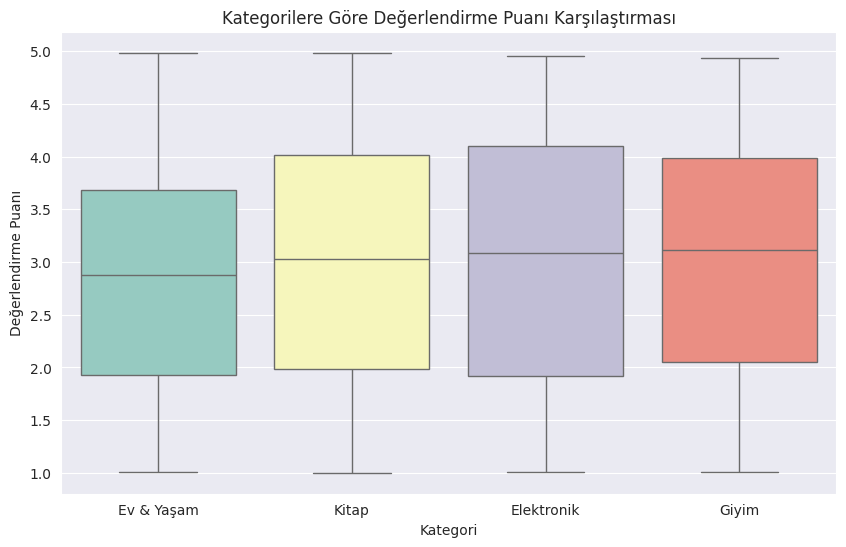

In [8]:
# 5. Kategorilere Göre Değerlendirme Puanı Karşılaştırması (Kutu Grafiği)
print("\n5. Kategorilere Göre Değerlendirme Puanı Karşılaştırması")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kategori', y='Değerlendirme', data=df, palette='Set3')
plt.title('Kategorilere Göre Değerlendirme Puanı Karşılaştırması')
plt.xlabel('Kategori')
plt.ylabel('Değerlendirme Puanı')
plt.show()


6. Satışlar ve Değerlendirme Puanlarının Zaman İçindeki Değişimi


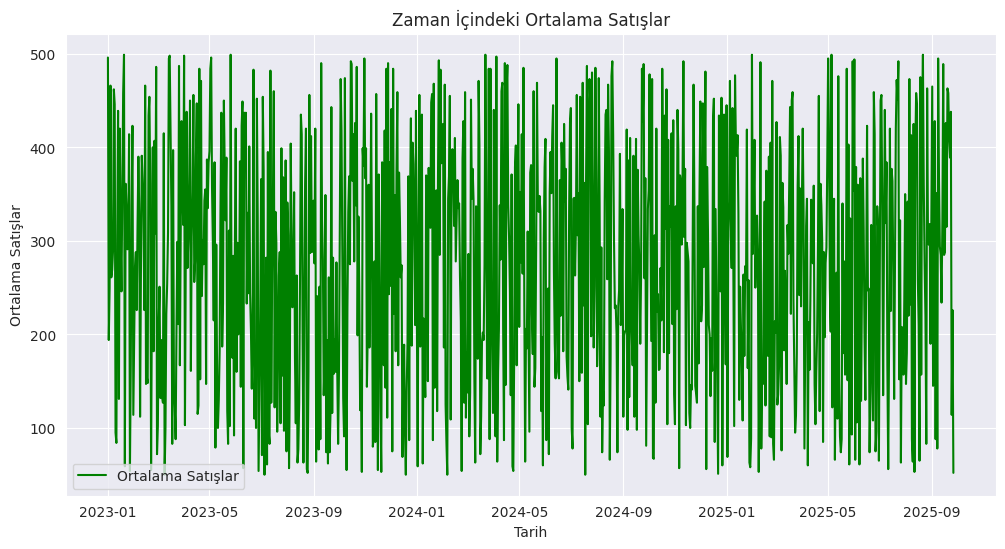

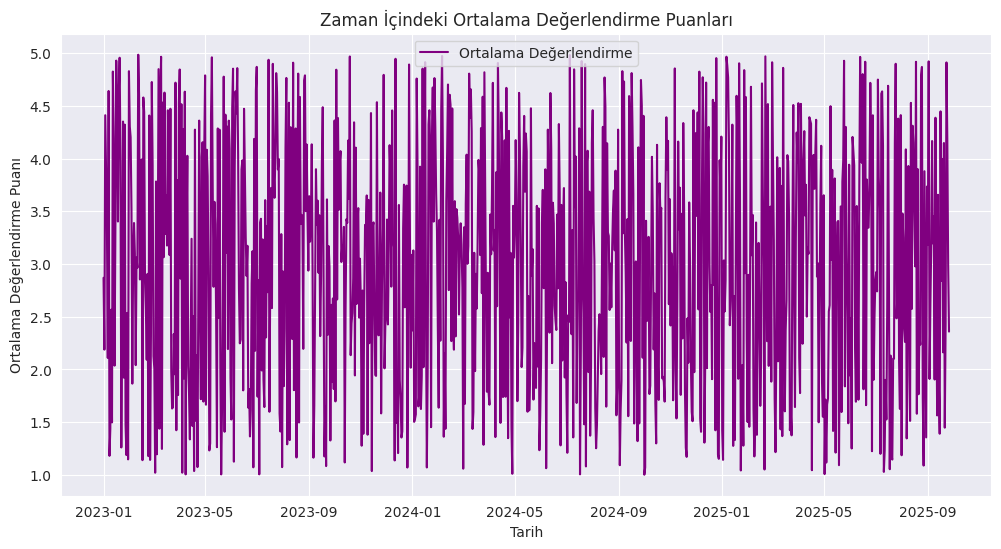

In [9]:
# 6. Satışlar ve Değerlendirme Puanlarının Zaman İçindeki Değişimi (Çizgi Grafikleri)
print("\n6. Satışlar ve Değerlendirme Puanlarının Zaman İçindeki Değişimi")
gunluk_ortalama = df.groupby('Tarih').agg({'Satışlar': 'mean', 'Değerlendirme': 'mean'}).reset_index()

# Çizgi Grafiği - Satışlar
plt.figure(figsize=(12, 6))
sns.lineplot(x='Tarih', y='Satışlar', data=gunluk_ortalama, label='Ortalama Satışlar', color='green')
plt.title('Zaman İçindeki Ortalama Satışlar')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Satışlar')
plt.legend()
plt.show()

# Çizgi Grafiği - Değerlendirme
plt.figure(figsize=(12, 6))
sns.lineplot(x='Tarih', y='Değerlendirme', data=gunluk_ortalama, label='Ortalama Değerlendirme', color='purple')
plt.title('Zaman İçindeki Ortalama Değerlendirme Puanları')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Değerlendirme Puanı')
plt.legend()
plt.show()